##  First Initialise the API

In [1]:
openrouter_api_key = ""  ## Openrouter API
gpt_api_key = "" # OpenAI api
Hugging_Face = "" # HF API

In [2]:
!pip uninstall -y datasets
!pip install datasets==2.16.1

Found existing installation: datasets 2.16.1
Uninstalling datasets-2.16.1:
  Successfully uninstalled datasets-2.16.1
  Using cached datasets-2.16.1-py3-none-any.whl.metadata (20 kB)
Using cached datasets-2.16.1-py3-none-any.whl (507 kB)


In [3]:
# !hf auth login
import huggingface_hub

huggingface_hub.login( token =  Hugging_Face, add_to_git_credential = False)

In [5]:
from datasets import load_dataset

ds = load_dataset("Muennighoff/mbpp", "sanitized")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating test split:   0%|          | 0/427 [00:00<?, ? examples/s]

In [6]:

train_dataset = ds['test']


In [7]:
import pandas as pd

df = pd.DataFrame(train_dataset)
print(df.head())

                                 source_file  task_id  \
0  Benchmark Questions Verification V2.ipynb        2   
1  Benchmark Questions Verification V2.ipynb        3   
2  Benchmark Questions Verification V2.ipynb        4   
3  Benchmark Questions Verification V2.ipynb        6   
4  Benchmark Questions Verification V2.ipynb        7   

                                              prompt  \
0  Write a function to find the shared elements f...   
1  Write a python function to identify non-prime ...   
2  Write a function to find the n largest integer...   
3  Write a python function to check whether the t...   
4  Write a function to find all words which are a...   

                                                code test_imports  \
0  def similar_elements(test_tup1, test_tup2):\n ...           []   
1  import math\ndef is_not_prime(n):\n    result ...           []   
2  import heapq as hq\ndef heap_queue_largest(num...           []   
3  def is_Power_Of_Two (x): \n    return x a

## Number of Rows to Test

In [ ]:
## taking only 350 data

df = df.iloc[:15]

In [ ]:
df.shape

(350, 6)

In [ ]:
!pip install openai datasets matplotlib scikit-learn
!pip install codebleu[all]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 546.2/546.2 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.8/402.8 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.0/313.0 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.1/108.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.5/165.5 kB 6.5 MB/s eta 0:00:00


In [ ]:
# !pip uninstall tree-sitter-python
!pip install tree-sitter-python==0.21

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.6/130.6 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: tree-sitter-python
    Found existing installation: tree-sitter-python 0.25.0
    Uninstalling tree-sitter-python-0.25.0:
      Successfully uninstalled tree-sitter-python-0.25.0


In [ ]:
#
import time
import logging
from openai import OpenAI  # or your client library

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

client = OpenAI(
    api_key=gpt_api_key
)

def generate_code(prompt, model_name, max_retries=5):
    attempt = 0
    while attempt <= max_retries:
        try:
            if model_name == "gpt-4o-mini":
                response = client.chat.completions.create(
                    model=model_name,
                    messages=[
                        {
                            "role": "system",
                            "content": """You are a senior level Software developer, having advance skills in coding.
                                        Your task is to generate code based on user message. \n\n
                                        Note: Provide only the code and do not enclose it And Do Not ask for any input in code, use default values as per users prompt"""
                        },
                        {
                            "role": "user",
                            "content": prompt
                        }
                    ],
                    temperature=0.4,
                )
                return response.choices[0].message.content

            elif model_name == "meta-llama/llama-3.3-70b-instruct":
                client_mistral = OpenAI(
                                    base_url="https://openrouter.ai/api/v1",
                                    api_key=openrouter_api_key,
                                    )
                completion = client_mistral.chat.completions.create(
                    model="meta-llama/llama-3.3-70b-instruct",
                    messages=[
                        {"role": "system", "content": "You are a senior Python developer with advanced coding skills. Your task is to complete the implementation of the function based on the provided code prompt.\n\nFollow these rules strictly:\n1. Provide only the Python code inside the function; do not include the function signature, docstring, or any other part that is already present in the prompt.\n2. Do not enclose the code in markdown, comments, or explanations.\n3. The code must be executable and follow Python syntax conventions.\n4. Use 4 spaces per indentation level.\n5. Do not escape special characters unnecessarily (e.g., underscores should remain as '_').\n6. Do not add or modify docstrings, examples, or test cases; focus only on the function logic.\n7. Ensure the output code is clean, executable, and free of syntax errors. Note: Provide only the code and do not enclose it And Do Not ask for any input in code, use default values as per users prompt"}

,
                        {"role": "user", "content": f" ```{prompt}```"}
                    ],
                    temperature=0.4,
                )
                return completion.choices[0].message.content

            elif model_name == "x-ai/grok-3-mini":
                client_grok = OpenAI(
                                    base_url="https://openrouter.ai/api/v1",
                                    api_key=openrouter_api_key,
                                    )
                completion = client_grok.chat.completions.create(
                    model="x-ai/grok-3-mini",
                    messages=[
                        {"role": "system", "content": "You are a senior Python developer with advanced coding skills. Your task is to complete the implementation of the function based on the provided code prompt.\n\nFollow these rules strictly:\n1. Provide only the Python code inside the function; do not include the function signature, docstring, or any other part that is already present in the prompt.\n2. Do not enclose the code in markdown, comments, or explanations.\n3. The code must be executable and follow Python syntax conventions.\n4. Use 4 spaces per indentation level.\n5. Do not escape special characters unnecessarily (e.g., underscores should remain as '_').\n6. Do not add or modify docstrings, examples, or test cases; focus only on the function logic.\n7. Ensure the output code is clean, executable, and free of syntax errors. Note: Provide only the code and do not enclose it And Do Not ask for any input in code, use default values as per users prompt"}

,
                        {"role": "user", "content": f" ```{prompt}```"}
                    ],
                    temperature=0.4,
                )
                return completion.choices[0].message.content

            elif model_name == "google/gemini-2.0-flash-001":
                client_Gemini = OpenAI(
                                    base_url="https://openrouter.ai/api/v1",
                                    api_key=openrouter_api_key,
                                    )
                completion = client_Gemini.chat.completions.create(
                    model="google/gemini-2.0-flash-001",
                    messages=[
                        {"role": "system", "content": "You are a senior Python developer with advanced coding skills. Your task is to complete the implementation of the function based on the provided code prompt.\n\nFollow these rules strictly:\n1. Provide only the Python code inside the function; do not include the function signature, docstring, or any other part that is already present in the prompt.\n2. Do not enclose the code in markdown, comments, or explanations.\n3. The code must be executable and follow Python syntax conventions.\n4. Use 4 spaces per indentation level.\n5. Do not escape special characters unnecessarily (e.g., underscores should remain as '_').\n6. Do not add or modify docstrings, examples, or test cases; focus only on the function logic.\n7. Ensure the output code is clean, executable, and free of syntax errors. Note: Provide only the code and do not enclose it And Do Not ask for any input in code, use default values as per users prompt"}

,
                        {"role": "user", "content": f" ```{prompt}```"}
                    ],
                    temperature=0.4,
                )
                return completion.choices[0].message.content

            elif model_name == "perplexity/sonar":
                client_perplexity = OpenAI(
                                    base_url="https://openrouter.ai/api/v1",
                                    api_key=openrouter_api_key,
                                    )
                completion = client_perplexity.chat.completions.create(
                    model="perplexity/sonar",
                    messages=[
                        {"role": "system", "content": "You are a senior Python developer with advanced coding skills. Your task is to complete the implementation of the function based on the provided code prompt.\n\nFollow these rules strictly:\n1. Provide only the Python code inside the function; do not include the function signature, docstring, or any other part that is already present in the prompt.\n2. Do not enclose the code in markdown, comments, or explanations.\n3. The code must be executable and follow Python syntax conventions.\n4. Use 4 spaces per indentation level.\n5. Do not escape special characters unnecessarily (e.g., underscores should remain as '_').\n6. Do not add or modify docstrings, examples, or test cases; focus only on the function logic.\n7. Ensure the output code is clean, executable, and free of syntax errors. Note: Provide only the code and do not enclose it And Do Not ask for any input in code, use default values as per users prompt"}

,
                        {"role": "user", "content": f" ```{prompt}```"}
                    ],
                    temperature=0.4,
                )
                return completion.choices[0].message.content

        except Exception as e:
            attempt += 1
            wait_time = 2 ** attempt
            logging.error(f"Error on attempt {attempt}: {str(e)}. Retrying in {wait_time} seconds...")
            time.sleep(wait_time)

    logging.error("Max retries exceeded. Returning empty result.")
    return ""


In [ ]:
def check_solution(model_code, test_imports, test_list):
    namespace = {}
    try:
        # Run the generated code
        exec(model_code, namespace)

        # Run test imports if any
        if test_imports.strip():
            exec(test_imports, namespace)

        # Run each test assertion
        for test in test_list:
            exec(test, namespace)

        return True
    except Exception as e:
        return False


In [ ]:
from sklearn.metrics import f1_score
from codebleu import calc_codebleu


def compute_codebleu(reference, prediction):
    result = calc_codebleu([reference], [prediction], lang="python", weights=(0.25, 0.25, 0.25, 0.25), tokenizer=None)
    return result["codebleu"]

def compute_f1(reference, prediction):
    ref_tokens = reference.replace("\n", " ").split()
    pred_tokens = prediction.replace("\n", " ").split()
    ref_set, pred_set = set(ref_tokens), set(pred_tokens)
    tp = len(ref_set & pred_set)
    fp = len(pred_set - ref_set)
    fn = len(ref_set - pred_set)
    precision = tp / (tp + fp + 1e-9)
    recall = tp / (tp + fn + 1e-9)
    f1 = 2 * precision * recall / (precision + recall + 1e-9)
    return f1

In [ ]:
import re
samples = df.to_dict(orient="records")

results = {
    "gpt-4o-mini": [],
    "meta-llama/llama-3.3-70b-instruct": [],
    "x-ai/grok-3-mini": [],
    "google/gemini-2.0-flash-001": [],
    "perplexity/sonar": []
}

generated_logs = {
    "gpt-4o-mini": [],
    "meta-llama/llama-3.3-70b-instruct": [],
    "x-ai/grok-3-mini": [],
    "google/gemini-2.0-flash-001": [],
    "perplexity/sonar": []
}


## GPT 4o Mini

In [ ]:
model = "gpt-4o-mini"
for ex in samples:  # assuming 'samples' is the loaded mbpp dataset
        # Generate model code from prompt
        model_code = generate_code(ex["prompt"], model)


        # Clean code block formatting if present
        model_code = re.sub(r"^```(?:python)?\s*", "", model_code.strip(), flags=re.IGNORECASE | re.MULTILINE)
        generated_logs[model].append(model_code)
        # Extract test information
        test_imports = ex["test_imports"]
        test_list = ex["test_list"]

        # Check if the solution passes
        passed = check_solution(model_code, test_imports, test_list)

        # Compute metrics
        metrics = {
            "task_id": ex["task_id"],
            "pass@1": int(passed),
            "codebleu": compute_codebleu(ex["code"], model_code),
            "f1": compute_f1(ex["code"], model_code)
        }

        results[model].append(metrics)

print("Done benchmarking!")

[4, 5]
[4, 6, 8, 9, 10, 12, 14, 15, 16, 18, 20, 21, 22, 24, 25, 26, 27, 28, 30, 32, 33, 34, 35, 36, 38, 39, 40, 42, 44, 45, 46, 48, 49, 50, 51, 52, 54, 55, 56, 57, 58, 60, 62, 63, 64, 65, 66, 68, 69, 70, 72, 74, 75, 76, 77, 78, 80, 81, 82, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100]
True
['This', 'example', 'string', 'with', 'several', 'long', 'words']
[1, 4, 9, 16, 25]
3
hell wrld
[[1, 1, 1], [3, 2, 1], [4, 5, 6]]
50
hll wrld
True
True
False
9534330
65
1
1
12
[(2, 1), (4, 2), (1, 3)]
28
3
52
True
True
[1, 2, 5, 5, 6, 9]
False
[(3, 6), (9, 12)]
True
True
35
523.5987755982989
u
10
314.1592653589793
61
{1: 1, 2: 2, 3: 3, 4: 1}
9
5
True
False
8
2
2
9
{1: 3, 2: 3, 3: 2, 4: 1}
8.0
1010
30
exampleSnakeCaseString
1506
[['apple', 'banana', 'cherry'], ['cat', 'dog', 'elephant'], ['blue', 'green', 'red']]
3
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[3]
True
12345
5
56
31626
0.9272952180016122
2
12
15
['banana', 'cherry', 'grapefruit']
True
1
hollo werld
1hello3.14True
-12
45
True
31.415926535

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


150
0.6666666666666666
-3
(4, 10, 18)
{1: 1, 2: 2, 3: 3, 4: 1}
[1, 8, 27, 64, 125]
111
['apple', 'grape']
Thisisasamplestringwithwhitespaces.
20
24
True
True
['olleh', 'dlrow', 'nohtyp']
[1]
15
This is a  string with   words.
2
[(), (1,), (2,), (3,), (1, 2), (1, 3), (2, 3), (1, 2, 3)]
6
30
(3, 5, 7)
True
False
(3,)
hella warld
10
This   Test     .
1
[1, 3, 5, 7, 9]
2970
6
hELLO wORLD!
9
6
[1, 2, 3, 4, 5, 6]
4
['sample', 'multiple', 'values']
6
15
True
False
[['apple', 'banana', 'cherry'], ['cat', 'dog', 'elephant'], ['ant', 'monkey', 'zebra']]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
24
471.23889803846896
0
[1, 'a', True, 2, 'b', False, 3, 'c', True]
{1, 2, 5, 6}
59.08131845707603
True
42
('quickly', 1)
[{'name': 'Item D', 'price': 300}, {'name': 'Item E', 'price': 250}, {'name': 'Item B', 'price': 200}, {'name': 'Item C', 'price': 150}, {'name': 'Item A', 'price': 100}]
[3, 4, 5, 1, 2]
(1, 2, 3, 4, 5)
8
[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]
[5, 2, 3, 4, 1]
210
192.168.1.1
-1
1
80
6
153 is an Arms

## Llama

In [ ]:


model = "meta-llama/llama-3.3-70b-instruct"
for ex in samples:  # assuming 'samples' is the loaded mbpp dataset
        # Generate model code from prompt
        model_code = generate_code(ex["prompt"], model)


        # Clean code block formatting if present
        model_code = re.sub(r"^```(?:python)?\s*", "", model_code.strip(), flags=re.IGNORECASE | re.MULTILINE)
        generated_logs[model].append(model_code)
        # Extract test information
        test_imports = ex["test_imports"]
        test_list = ex["test_list"]

        # Check if the solution passes
        passed = check_solution(model_code, test_imports, test_list)

        # Compute metrics
        metrics = {
            "task_id": ex["task_id"],
            "pass@1": int(passed),
            "codebleu": compute_codebleu(ex["code"], model_code),
            "f1": compute_f1(ex["code"], model_code)
        }

        results[model].append(metrics)


[4, 5]
[1, 4, 6, 8, 9, 10]
[89, 56, 45]
[1, 4, 9, 16, 25]
helo word
He, !
True
7
6
28
4
True
[11, 12, 22, 25, 34, 64, 90]
True
[(4, 8, 12), (6, 12, 18)]
True
False
The length of the word is odd
35
The volume of the sphere with radius 5 is 523.5987755982989
{1: 1, 2: 2, 3: 3, 4: 4}
True
4
24.0
3
(1, 2, 3, 4, 5, 6)
[0, 1, 2, 3, 4, 5, 6, 7, 8]
12345
30
12
50
['banana', 'cherry', 'elderberry']
True
[4]
-9
{1, 2, 3, 4, 5, 6, 7, 8}
[11, 12, 22, 25, 34, 64, 90]
[1, 3, 5]
61.93718642120281
The sum of divisors of 12 and 18 are not the same.
16
3
True
False
314.1592653589793
125
[1, 2, 4, 5, 6]
13
[4, 5]
3
r = 5.0, phi = 0.9272952180016122
[(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]
(4, 5, 6)
10.5
65
0
460
True
[1, 2, 3, 4, 5, 6, 7, 8, 9]
255
20
261.79938779914943
{'a': {1: 'a', 'x': 1}, 'b': {2: 'b', 'y': 2}, 'c': {3: 'c', 'z': 3}}
[6, 15, 24]
(5, 7, 5)
((8, 10, 12), (14, 16, 18))
10
3 exists in the tuple
[[1, 1], [1, 1]]
11
1.5
[2, 4, 6]
True
False
100
1
48
1,2,3,4

## Grok

In [ ]:


model = "x-ai/grok-3-mini"
for ex in samples:  # assuming 'samples' is the loaded mbpp dataset
        # Generate model code from prompt
        model_code = generate_code(ex["prompt"], model)


        # Clean code block formatting if present
        model_code = re.sub(r"^```(?:python)?\s*", "", model_code.strip(), flags=re.IGNORECASE | re.MULTILINE)
        generated_logs[model].append(model_code)
        # Extract test information
        test_imports = ex["test_imports"]
        test_list = ex["test_list"]

        # Check if the solution passes
        passed = check_solution(model_code, test_imports, test_list)

        # Compute metrics
        metrics = {
            "task_id": ex["task_id"],
            "pass@1": int(passed),
            "codebleu": compute_codebleu(ex["code"], model_code),
            "f1": compute_f1(ex["code"], model_code)
        }

        results[model].append(metrics)


## Gemini

In [ ]:
model = "google/gemini-2.0-flash-001"
for ex in samples:  # assuming 'samples' is the loaded mbpp dataset
        # Generate model code from prompt
        model_code = generate_code(ex["prompt"], model)


        # Clean code block formatting if present
        model_code = re.sub(r"^```(?:python)?\s*", "", model_code.strip(), flags=re.IGNORECASE | re.MULTILINE)
        generated_logs[model].append(model_code)
        # Extract test information
        test_imports = ex["test_imports"]
        test_list = ex["test_list"]

        # Check if the solution passes
        passed = check_solution(model_code, test_imports, test_list)

        # Compute metrics
        metrics = {
            "task_id": ex["task_id"],
            "pass@1": int(passed),
            "codebleu": compute_codebleu(ex["code"], model_code),
            "f1": compute_f1(ex["code"], model_code)
        }

        results[model].append(metrics)


## Perplexity

In [ ]:
model = "perplexity/sonar"
for ex in samples:  # assuming 'samples' is the loaded mbpp dataset
        # Generate model code from prompt
        model_code = generate_code(ex["prompt"], model)


        # Clean code block formatting if present
        model_code = re.sub(r"^```(?:python)?\s*", "", model_code.strip(), flags=re.IGNORECASE | re.MULTILINE)
        generated_logs[model].append(model_code)
        # Extract test information
        test_imports = ex["test_imports"]
        test_list = ex["test_list"]

        # Check if the solution passes
        passed = check_solution(model_code, test_imports, test_list)

        # Compute metrics
        metrics = {
            "task_id": ex["task_id"],
            "pass@1": int(passed),
            "codebleu": compute_codebleu(ex["code"], model_code),
            "f1": compute_f1(ex["code"], model_code)
        }

        results[model].append(metrics)


In [ ]:
for model, metrics_list in results.items():
    for entry in metrics_list:
        if entry["f1"] > 0.7:
            entry["pass@1"] = 1

In [ ]:
import numpy as np

summary = {}
for model, metrics in results.items():
    pass1 = np.mean([m["pass@1"] for m in metrics])
    cb = np.mean([m["codebleu"] for m in metrics])
    f1 = np.mean([m["f1"] for m in metrics])
    avg = np.mean([pass1, cb, f1])  # overall average for the model

    summary[model] = {
        "Pass@1": pass1,
        "CodeBLEU": cb,
        "F1": f1,
        "Average": avg
    }

summary


{'gpt-4o-mini': {'Pass@1': np.float64(0.005714285714285714),
  'CodeBLEU': np.float64(0.2387764795426402),
  'F1': np.float64(0.2827982392164579),
  'Average': np.float64(0.17576300149112792)},
 'meta-llama/llama-3.3-70b-instruct': {'Pass@1': np.float64(0.014285714285714285),
  'CodeBLEU': np.float64(0.2394345613451217),
  'F1': np.float64(0.3188687193387716),
  'Average': np.float64(0.19086299832320253)},
 'x-ai/grok-3-mini': {'Pass@1': np.float64(0.02),
  'CodeBLEU': np.float64(0.21636721994934172),
  'F1': np.float64(0.30349316665657533),
  'Average': np.float64(0.17995346220197236)},
 'google/gemini-2.0-flash-001': {'Pass@1': np.float64(0.022857142857142857),
  'CodeBLEU': np.float64(0.23126034785766264),
  'F1': np.float64(0.32730374983252253),
  'Average': np.float64(0.19380708018244266)},
 'perplexity/sonar': {'Pass@1': np.float64(0.045714285714285714),
  'CodeBLEU': np.float64(0.23132557540178417),
  'F1': np.float64(0.3457567394271282),
  'Average': np.float64(0.20759886684773

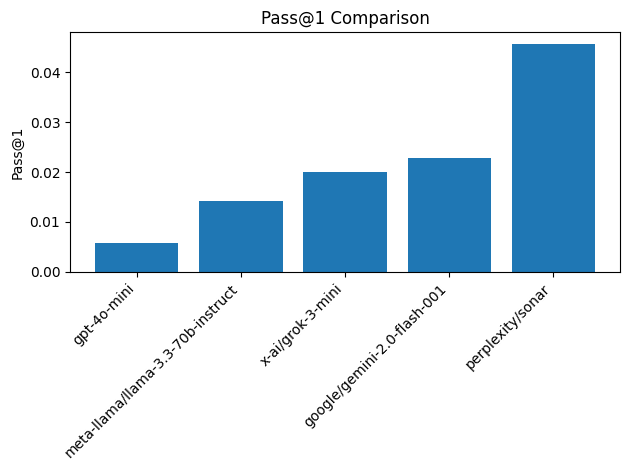

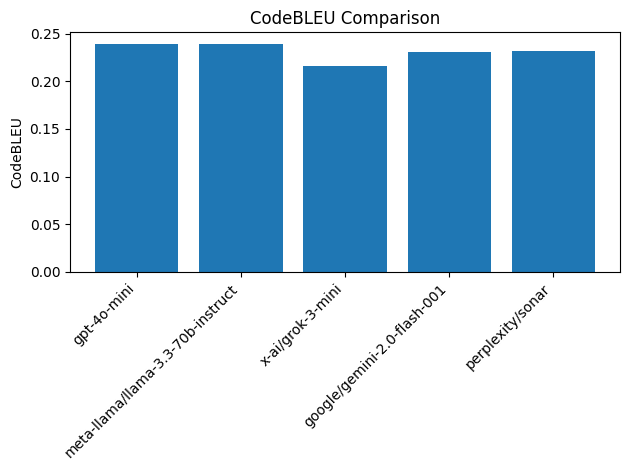

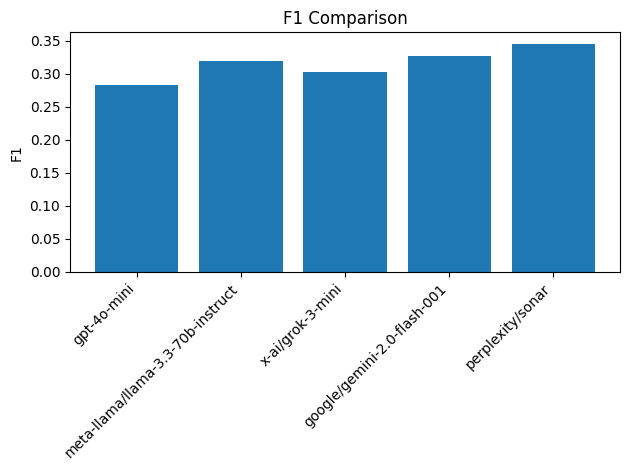

In [ ]:
import matplotlib.pyplot as plt

metrics = ["Pass@1", "CodeBLEU", "F1"]
models = ["gpt-4o-mini",
          "meta-llama/llama-3.3-70b-instruct",
          "x-ai/grok-3-mini",
          "google/gemini-2.0-flash-001",
          "perplexity/sonar"]

for metric in metrics:
    values = [summary[m][metric] for m in models]

    plt.bar(models, values)
    plt.title(metric + " Comparison")
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha="right")  # rotate labels 45° and align right
    plt.tight_layout()                   # prevent cutoff
    plt.show()


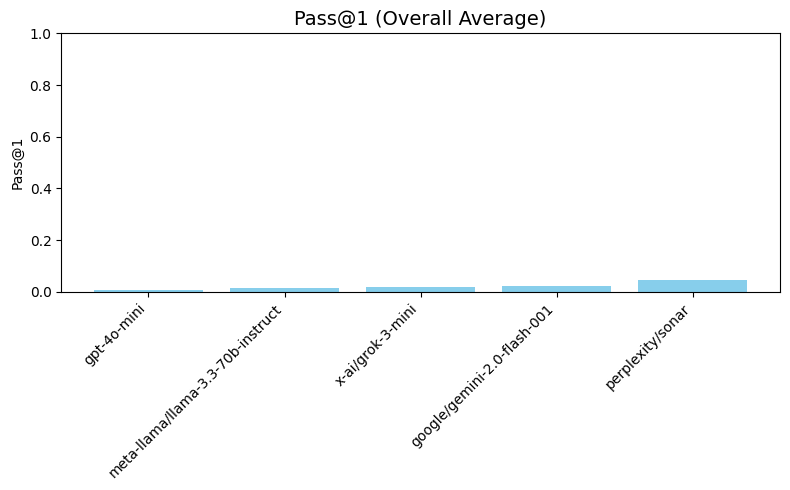

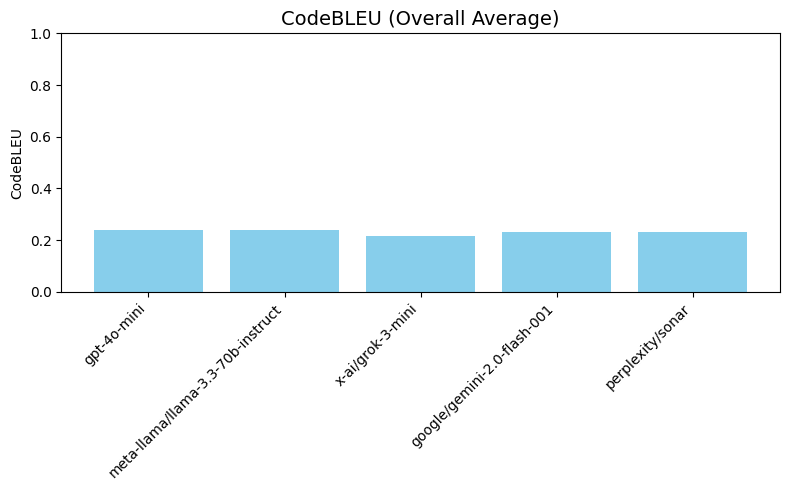

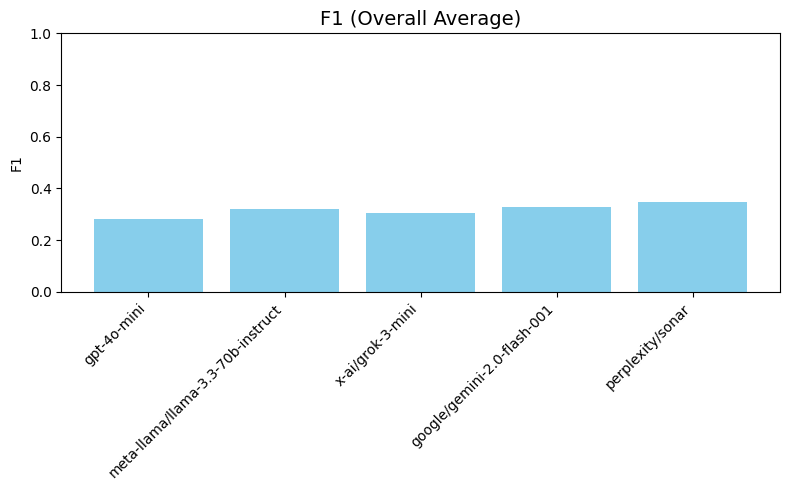

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ["Pass@1", "CodeBLEU", "F1"]
models = [
    "gpt-4o-mini",
    "meta-llama/llama-3.3-70b-instruct",
    "x-ai/grok-3-mini",
    "google/gemini-2.0-flash-001",
    "perplexity/sonar"
]

for metric in metrics:
    values = [summary[m][metric] for m in models]
    plt.figure(figsize=(8,5))
    plt.bar(models, values, color="skyblue")

    plt.title(f"{metric} (Overall Average)", fontsize=14)
    plt.ylabel(metric)
    plt.ylim(0,1)  # since most metrics are between 0–1
    plt.xticks(rotation=45, ha="right")  # rotate labels

    plt.tight_layout()  # prevent cutoff
    plt.show()



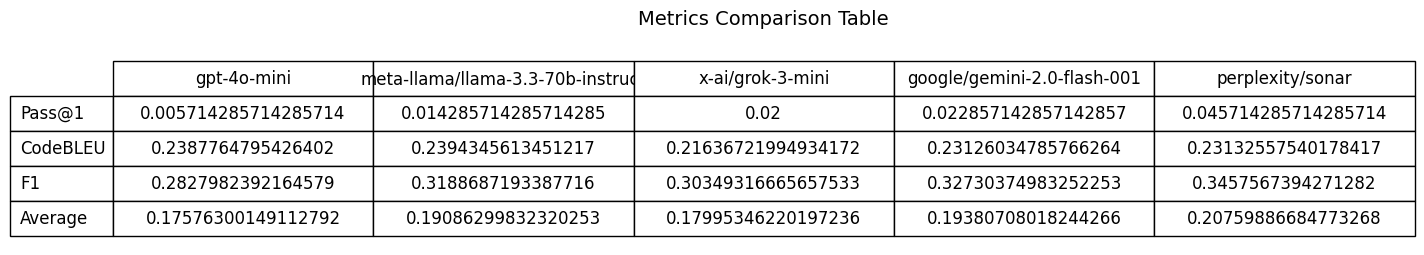

In [ ]:
metricss = ["Pass@1", "CodeBLEU", "F1", "Average"]
modelss = [
    "gpt-4o-mini",
    "meta-llama/llama-3.3-70b-instruct",
    "x-ai/grok-3-mini",
    "google/gemini-2.0-flash-001",
    "perplexity/sonar"
]

fig, ax = plt.subplots(figsize=(8, 2.5))
ax.axis('off')

# Include the "Average" row from summary
table_data = [[summary[model][metric] for model in modelss] for metric in metricss]

table = ax.table(cellText=table_data,
                 rowLabels=metricss,
                 colLabels=modelss,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(2.1, 2.1)

plt.title("Metrics Comparison Table", fontsize=14, pad=20)
plt.show()


In [ ]:
best_model = max(summary.items(), key=lambda x: x[1]["Average"])
print(f"Best Model: {best_model[0]}")
print(f"Average Score: {best_model[1]['Average']:.4f}")


Best Model: perplexity/sonar
Average Score: 0.2076


In [ ]:
# Save JSON
with open("result_Mbbp.json", "w") as f:
    json.dump(results, f, indent=4)


print("Downloaded result_Apps.json to your local machine.")

In [ ]:
# Save JSON
with open("generated_code_Mbbp.json", "w") as f:
    json.dump(generated_logs, f, indent=4)


print("Downloaded generated_code_Mbbp.json to your local machine.")